In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

#### Load and understand data

In [2]:
df = pd.read_csv('Historical Product Demand.csv')

In [3]:
print(df.head())
print(df.shape, df.columns)

   Product_Code Warehouse Product_Category       Date Order_Demand
0  Product_0993    Whse_J     Category_028  2012/7/27         100 
1  Product_0979    Whse_J     Category_028  2012/1/19         500 
2  Product_0979    Whse_J     Category_028   2012/2/3         500 
3  Product_0979    Whse_J     Category_028   2012/2/9         500 
4  Product_0979    Whse_J     Category_028   2012/3/2         500 
(1048575, 5) Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand'],
      dtype='object')


In [4]:
print(df.Product_Code.unique(), df.Warehouse.unique(), df.Product_Category.nunique(), df.Order_Demand.nunique())

['Product_0993' 'Product_0979' 'Product_1159' ... 'Product_0237'
 'Product_0644' 'Product_0853'] ['Whse_J' 'Whse_S' 'Whse_C' 'Whse_A'] 33 3828


In [5]:
df.dtypes

Product_Code        object
Warehouse           object
Product_Category    object
Date                object
Order_Demand        object
dtype: object

In [6]:
def check_order_demand(x):
    try:
        int(x)
    except:
        return False
    return True
#Check where Order_demand is not an integer
df[~df.Order_Demand.apply(lambda x: check_order_demand(x))].head(6)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
112290,Product_2169,Whse_A,Category_024,2012/8/9,(1)
112307,Product_2132,Whse_A,Category_009,2012/11/1,(24)
112308,Product_2144,Whse_A,Category_009,2012/11/1,(24)
112356,Product_2118,Whse_A,Category_009,2012/3/7,(50)
112357,Product_2120,Whse_A,Category_009,2012/3/7,(100)
112360,Product_1794,Whse_A,Category_024,2012/6/28,(1)


In [7]:
# Convert the Order_demand to an Integer
def change_to_int(x):
    try:
        return int(x)
    except:
        return int(x[1:-1])
check = '(10)'
change_to_int(check)

10

In [8]:
df.Order_Demand = df.Order_Demand.apply(lambda x: change_to_int(x) )
df.describe()

,Order_Demand
count,1.048575e+06
mean,4.906977e+03
std,2.892678e+04
min,0.000000e+00
25%,2.000000e+01
50%,3.000000e+02
75%,2.000000e+03
max,4.000000e+06


In [9]:
# Rename the columns
df = df.rename(columns = {'Product_Code': 'Code',
                    'Product_Category':'Category',
                    'Order_Demand':'Demand'})
df.head()

,Code,Warehouse,Category,Date,Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [10]:
# Check for missing data
df.isna().sum()

Code             0
Warehouse        0
Category         0
Date         11239
Demand           0
dtype: int64

In [11]:
df = df.dropna()
df.isna().sum()

Code         0
Warehouse    0
Category     0
Date         0
Demand       0
dtype: int64

#### Check the sampled data

In [12]:
# Check the length of time the data was collected
df.Date.min(), df.Date.max()

('2011/1/8', '2017/1/9')

In [13]:
df.Date.sort_values().unique()[:10]

array(['2011/1/8', '2011/10/20', '2011/10/31', '2011/11/18', '2011/11/21',
       '2011/11/22', '2011/11/23', '2011/11/24', '2011/11/25',
       '2011/11/28'], dtype=object)

The data is irregularly sampled. Possible techniques to deal with it could be:
    1) Interpolate the time series data
    2) Resample

In [14]:
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1037336 entries, 2012-07-27 to 2016-06-27
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Code       1037336 non-null  object
 1   Warehouse  1037336 non-null  object
 2   Category   1037336 non-null  object
 3   Demand     1037336 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 39.6+ MB


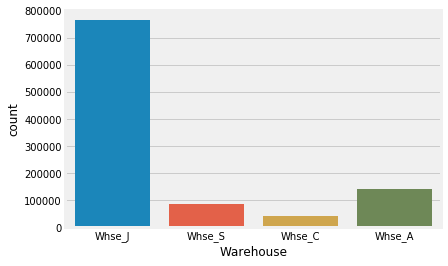

In [16]:
sns.countplot(x = 'Warehouse', data = df)

Warehouse J has signifcantly high orders as compared to other warehouses.

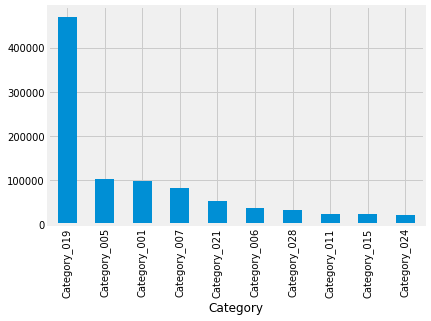

In [17]:
# We plot the top ten categories
df.Category.value_counts().head(10).plot(kind = 'bar')
plt.xlabel('Category')
plt.show()

Category _019 has signifantly large orders

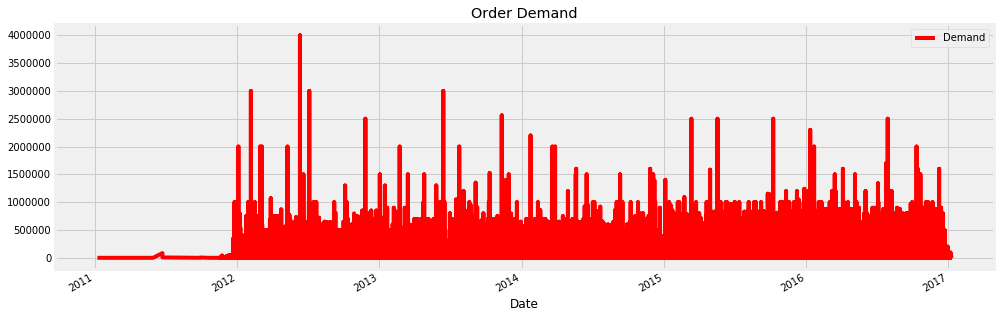

In [18]:
df.plot( figsize = (15,5), color = 'red', title = 'Order Demand')
plt.show()

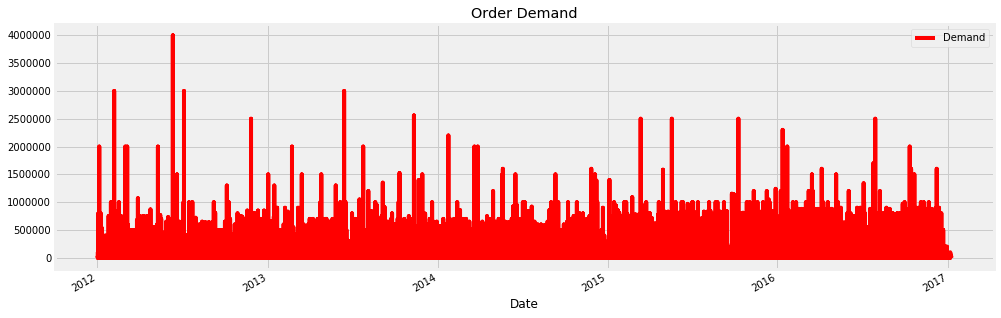

In [19]:
# The plot seems to have missing data before 2012.
df_new = df.loc[df.index >= '01-01-2012']
df_new.plot(figsize = (15,5), color = 'red', title = 'Order Demand')
plt.show()

In [20]:
# Find skewness in data
df.Demand.skew()

31.432925049321977

### Multivariate Analysis

In [21]:
# Total demand by warehoue
Warehouse_demand = df.groupby('Warehouse')['Demand'].sum()
Warehouse_demand

Warehouse
Whse_A     147877431
Whse_C     585071404
Whse_J    3363200396
Whse_S    1038024700
Name: Demand, dtype: int64

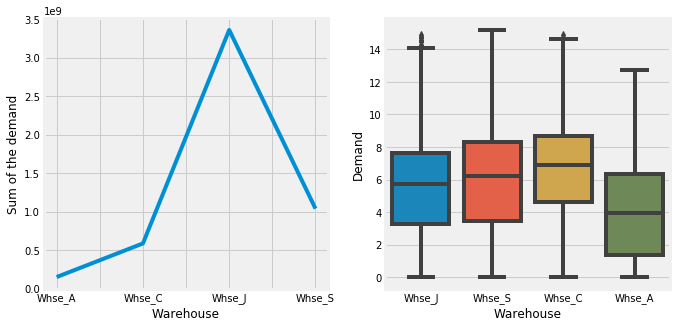

In [22]:
plt.subplot(1, 2, 1)
Warehouse_demand.plot(ylabel = 'Sum of the demand', figsize = (10,5))

# Distribution of log demands in warehouses
plt.subplot(1, 2, 2)
sns.boxplot( df['Warehouse'],np.log1p(df['Demand']))
plt.show()

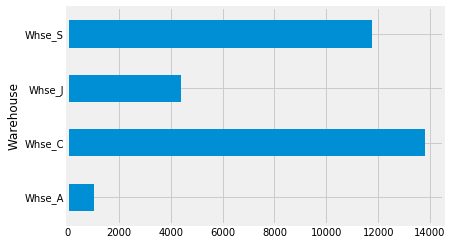

In [23]:
# Average Demand by Warehouse
df.groupby('Warehouse')['Demand'].mean().plot(kind = 'barh')
plt.show()

In [24]:
df.head()

,Code,Warehouse,Category,Demand
Date,,,,
2012-07-27,Product_0993,Whse_J,Category_028,100
2012-01-19,Product_0979,Whse_J,Category_028,500
2012-02-03,Product_0979,Whse_J,Category_028,500
2012-02-09,Product_0979,Whse_J,Category_028,500
2012-03-02,Product_0979,Whse_J,Category_028,500


### Feature Engineering

In [25]:
# def features(dataframe):
def features(df):    
    dataframe = df.copy()
    dataframe['day_of_week'] = dataframe.index.dayofweek
    dataframe['Quarter'] = dataframe.index.quarter
    dataframe['Month'] = dataframe.index.month
    dataframe['Year'] = dataframe.index.year
    dataframe['Week'] = dataframe.index.isocalendar().week.astype(int)
    return dataframe

df = features(df_new)
df.dtypes

Code           object
Warehouse      object
Category       object
Demand          int64
day_of_week     int64
Quarter         int64
Month           int64
Year            int64
Week            int64
dtype: object

In [26]:
df.head()

,Code,Warehouse,Category,Demand,day_of_week,Quarter,Month,Year,Week
Date,,,,,,,,,
2012-07-27,Product_0993,Whse_J,Category_028,100,4,3,7,2012,30
2012-01-19,Product_0979,Whse_J,Category_028,500,3,1,1,2012,3
2012-02-03,Product_0979,Whse_J,Category_028,500,4,1,2,2012,5
2012-02-09,Product_0979,Whse_J,Category_028,500,3,1,2,2012,6
2012-03-02,Product_0979,Whse_J,Category_028,500,4,1,3,2012,9


In [27]:
# Set features and target
Features = ['day_of_week', 'Quarter', 'Month', 'Year', 'Week']
Target = ['Demand']

## Model: XGboost

In [28]:
# split data
train_data = df.loc[df.index <= '2016-01-01'].copy()
test_data = df.loc[df.index > '2016-01-01'].copy()

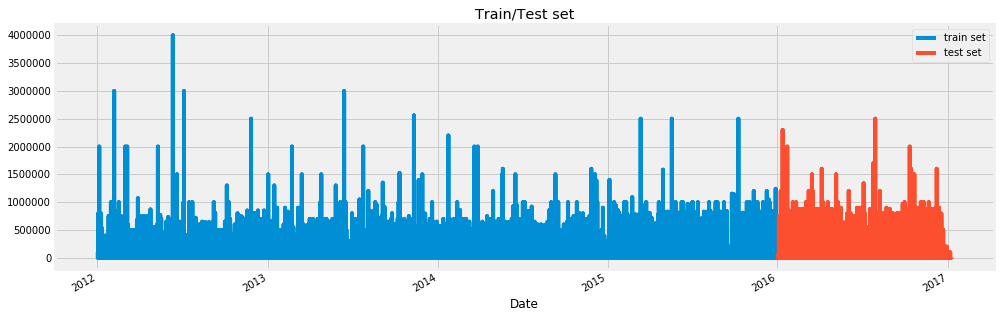

In [29]:
# plot test and train data
fig, ax = plt.subplots(figsize = (15,5))
train_data.Demand.plot(ax = ax, label = 'train set',legend = 'train set', title = 'Train/Test set')
test_data.Demand.plot(ax = ax, legend = 'train set', label = 'test set')
plt.show()

In [36]:
X_train = train_data[Features]
X_test = test_data[Features]

y_train = train_data[Target]
y_test = test_data[Target]

In [38]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators = 1000,
                    early_stopping_rounds = 50,
                    learning_rate = 0.01).fit(X_train, y_train,
                                                   eval_set = [(X_train,y_train), (X_test,y_test)],
                                                   verbose = 50)

[0]	validation_0-rmse:29022.32262	validation_1-rmse:31197.27223
[50]	validation_0-rmse:28751.26232	validation_1-rmse:30911.52767
[100]	validation_0-rmse:28649.88730	validation_1-rmse:30807.02893
[150]	validation_0-rmse:28610.22760	validation_1-rmse:30769.57999
[200]	validation_0-rmse:28594.02541	validation_1-rmse:30758.13682
[250]	validation_0-rmse:28586.47749	validation_1-rmse:30755.14557
[300]	validation_0-rmse:28582.88804	validation_1-rmse:30754.97119
[314]	validation_0-rmse:28582.14132	validation_1-rmse:30755.65478


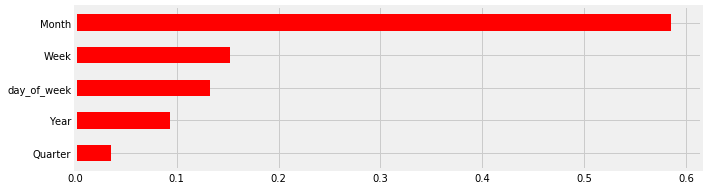

In [45]:
# Feature importance
imp_features = pd.DataFrame(model.feature_importances_, index= Features, columns = ['Feature_imp'])

imp_features.Feature_imp.sort_values().plot(kind = 'barh', figsize =(10,3), color = 'red')

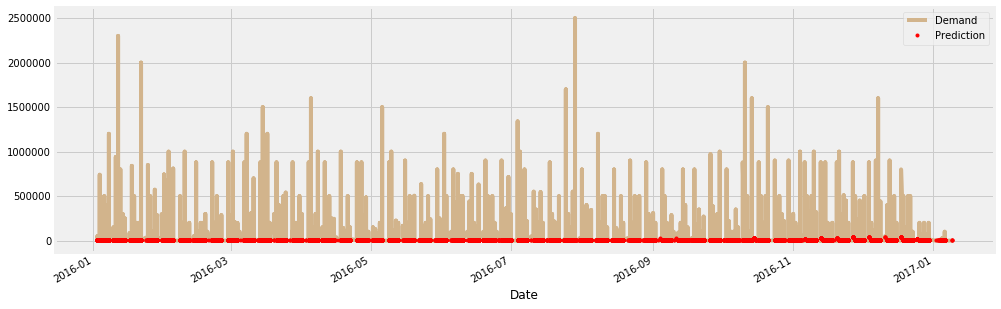

In [54]:
# Forecast on test

test_data['Prediction'] = model.predict(X_test)

fig, ax = plt.subplots( figsize = (15,5))
test_data.Demand.plot(ax = ax, color = 'tan', legend = 'Testing')
test_data.Prediction.plot(ax = ax, color = 'r', style = '.', legend = 'Prediction')

plt.show()

XGBoost clearly didn't work well